In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

In [89]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [90]:
X=pd.DataFrame(digits.data)
y=pd.DataFrame(digits.target)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [91]:
y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [92]:
y = np.ravel(y)


In [93]:
m_p = {
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 5, 10],
            'gamma': ['scale', 'auto'],
            'kernel': ['linear', 'rbf']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10, 20],
            'criterion': ['gini', 'entropy']
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0]
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10, 20]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=5000, solver='lbfgs'),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10, 20]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10, 20],
            'criterion': ['squared_error', 'friedman_mse']
        }
    },
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    }
    ,
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3,5,10],
            'weights' : ['uniform', 'distance']
        }
    }
}


In [94]:
scores=[]

for model_name, mp in m_p.items():
  clf=GridSearchCV(mp['model'],mp['params'],cv=10,return_train_score=False)
  clf.fit(digits.data,digits.target)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })

In [95]:
scr = pd.DataFrame(scores,columns=['model','best_score','best_params']).sort_values(by='best_score',ascending=False)
scr

,model,best_score,best_params
0,SVM,0.982182,"{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}"
9,KNeighborsClassifier,0.977185,"{'n_neighbors': 3, 'weights': 'distance'}"
1,RandomForestClassifier,0.953805,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
5,LogisticRegression,0.938222,"{'C': 0.01, 'penalty': 'l2'}"
3,MultinomialNB,0.879789,{'alpha': 0.1}
6,RandomForestRegressor,0.839311,"{'max_depth': None, 'n_estimators': 100}"
4,DecisionTreeClassifier,0.830807,"{'criterion': 'gini', 'max_depth': None}"
2,GaussianNB,0.811390,{}
7,DecisionTreeRegressor,0.618023,"{'criterion': 'friedman_mse', 'max_depth': 10}"
8,LinearRegression,0.534387,{}


Text(0, 0.5, 'Score')

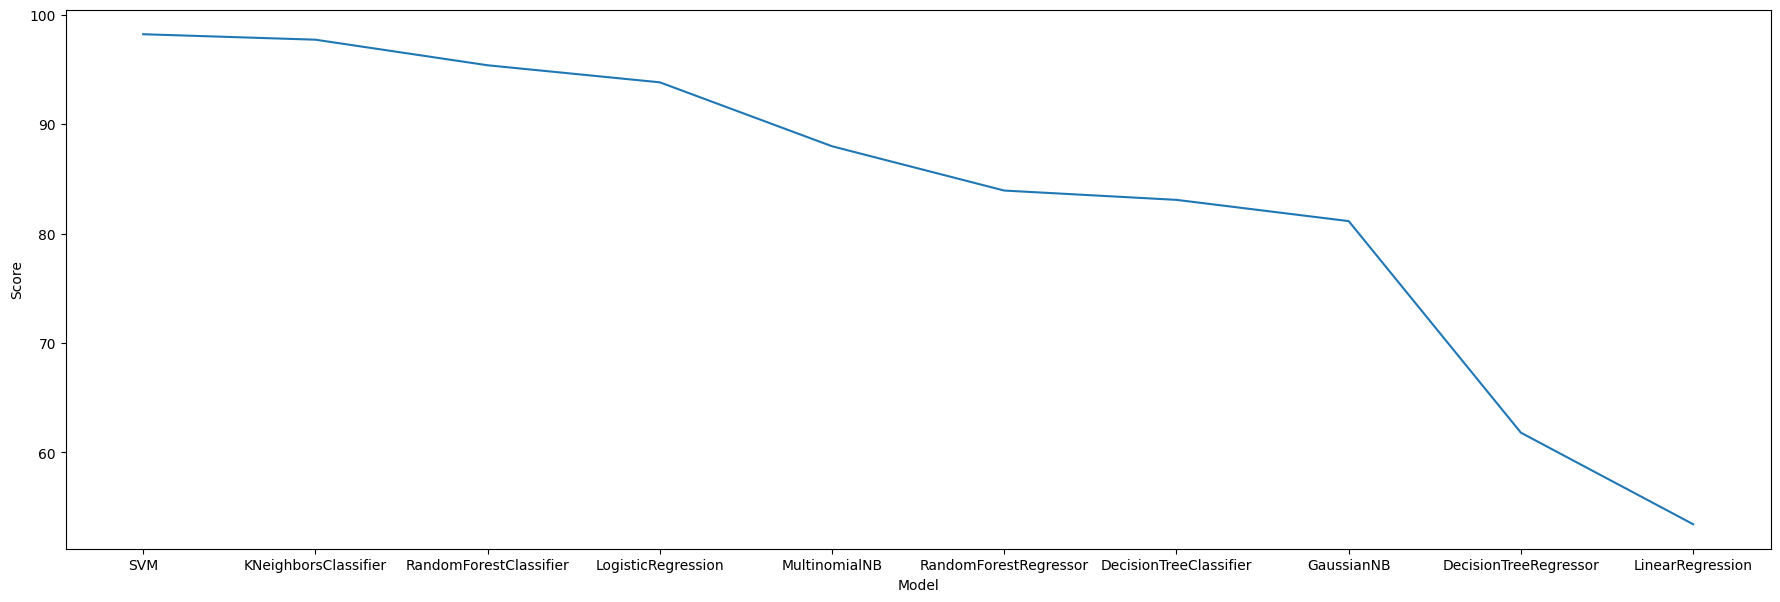

In [97]:
plt.figure(figsize=(22,7))
plt.plot(scr['model'],scr['best_score']*100)
plt.xlabel('Model')
plt.ylabel('Score')

**SVM** with parametersn C : 5, gamma : scale , kernel: rbf has the highest beacuse Non-linearly separable data


**Classifiers** are better than regressors as we are dealing with categorical values rather than continious